# Лабораторная работа №4 по курсу "Интеллектуальный анализ данных".

Лабораторная работа №4 "Деревья решений".<br>
Выполнил студент группы 6133-010402 Мелешенко Иван.

# [**Задание на лабораторную работу.**](https://github.com/kvvik/DS_SamU/blob/main/tasks/lab_4_trees_groupNumber_SecondName.ipynb)

## ***Задание 1.***<br>Выберите наборы данных, подходящие для многоклассовой и бинарной классификации.<br>

Произвести описание данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

---

## ***Задание 2.***<br>Демонстрация работы KNeighborsClassifier<br>

* Для вашего датасета преобразовать категориальные признаки в бинарные с помощью pd.factorize / pd.get_dummies
* С помощью sklearn.preprocessing.StandardScaler нормализовать значения признаков и построить для нормализованного датасета KNeighborsClassifier (без использования конвееров)
* То же самое и использованием sklearn.pipeline.Pipeline
* С помощью GridSearchCV произвести подбор гиперпараметра KNeighborsClassifier (n_neighbors) и выведите значение гиперпараметра и метрику для наилучшей модели

---

## ***Задание 3.***<br>Демонстрация работы DecisionTreeClassifier<br>

* Продемонстрировать работу DecisionTreeClassifier, посчитать метрики качества на отложенной выборке
* С помощью GridSearchCV произвести подбор гиперпараметров для поиска наилучшего дерева (перебрать max_depth, max_features и может быть что-то ещё)
* Для полученного наилучшего дерева построить график feature_importances и дополнительно напечатать 3 наиболее важных признака, отсортировав их по убыванию важности

---

## ***Задание 4.***<br>Демонстрация работы RandomForestClassifier<br>

* Продемонстрировать работу случайного леса RandomForestClassifier
* С помощью GridSearchCV произвести подбор гиперпараметров для поиск наилучшего леса, посмотреть насколько улучшились метрики


---

## ***Задание 5.***<br>Подведение итогов<br>

Сделать выводы. Какой классификатор и с камими гиперпараметрами дал в итоге наилучший результат для выбранного датасета на отложенной выборке.

# Выполнение заданий лабораторной работы

## Этап 0. Подготовка данных.

### Импорт библиотек.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import sklearn.model_selection
import numpy as np
import sklearn.metrics as metr
import sklearn.pipeline
import sklearn.tree
import matplotlib.pyplot as plt
import sklearn.ensemble
import warnings
import sys  
if not sys.warnoptions:
    warnings.simplefilter("ignore")

### Подключение Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Описание [Dataset](http://archive.ics.uci.edu/ml/datasets/Automobile)

In [ ]:
fp = "/content/drive/MyDrive/datasets/imports-85_inf.txt" #вытащим описание датасета
with open(fp) as file_handler:
    for line in file_handler:
        print(line)

### Загрузка Dataset-а

In [ ]:
machframe = pd.read_csv("/content/drive/MyDrive/datasets/imports-85.txt",names=['symboling', 'normalized-losses', 'make', 'fuel-type', 
                                           'aspiration', 'num-of-doors','body-style','drive-wheels',
                                           'engine-location','wheel-base','length','width','height',
                                           'curb-weight','engine-type','num-of-cylinders','engine-size',
                                           'fuel-system','bore','stroke','compression-ratio','horsepower',
                                          'peak-rpm','city-mpg','highway-mpg','price'])

### Просмотр Dataset-а

In [ ]:
machframe.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


### Предварительная обработка Dataset-а

In [ ]:
machframe = machframe[machframe[:] != '?'].iloc[:,:] #найдем все пропуски в данных и заменим их на медианный
machframe.fillna(machframe.median(), inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
mach = machframe.drop(columns=['make', 'body-style', 'drive-wheels', 'fuel-system', 'engine-type'])

In [ ]:
mach = pd.concat([mach,pd.get_dummies(machframe['make'],drop_first = True)],axis = 1)
mach = pd.concat([mach,pd.get_dummies(machframe['body-style'],drop_first = True)],axis = 1)
mach = pd.concat([mach,pd.get_dummies(machframe['drive-wheels'],drop_first = True)],axis = 1)
mach = pd.concat([mach,pd.get_dummies(machframe['fuel-system'],drop_first = True)],axis = 1)
mach = pd.concat([mach,pd.get_dummies(machframe['engine-type'], drop_first = True)],axis = 1)

## Этап 1. Демонстрация работы KNeighborsClassifier

### Преобразование категориальных признаков в бинарные с помощью pd.factorize / pd.get_dummies

In [ ]:
mach['fuel-type'] = pd.factorize(machframe['fuel-type'])[0]
mach['aspiration'] = pd.factorize(machframe['aspiration'])[0]
mach['num-of-doors'] = pd.factorize(machframe['num-of-doors'])[0]
mach['engine-location'] = pd.factorize(machframe['engine-location'])[0]
mach['num-of-cylinders'] = pd.factorize(machframe['num-of-cylinders'])[0]
mach

,symboling,normalized-losses,fuel-type,aspiration,num-of-doors,engine-location,wheel-base,length,width,height,...,mfi,mpfi,spdi,spfi,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,115.0,0,0,0,0,88.6,168.8,64.1,48.8,...,0,1,0,0,0,0,0,0,0,0
1,3,115.0,0,0,0,0,88.6,168.8,64.1,48.8,...,0,1,0,0,0,0,0,0,0,0
2,1,115.0,0,0,0,0,94.5,171.2,65.5,52.4,...,0,1,0,0,0,0,0,0,1,0
3,2,164,0,0,1,0,99.8,176.6,66.2,54.3,...,0,1,0,0,0,0,1,0,0,0
4,2,164,0,0,1,0,99.4,176.6,66.4,54.3,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,0,0,1,0,109.1,188.8,68.9,55.5,...,0,1,0,0,0,0,1,0,0,0
201,-1,95,0,1,1,0,109.1,188.8,68.8,55.5,...,0,1,0,0,0,0,1,0,0,0
202,-1,95,0,0,1,0,109.1,188.8,68.9,55.5,...,0,1,0,0,0,0,0,0,1,0
203,-1,95,1,1,1,0,109.1,188.8,68.9,55.5,...,0,0,0,0,0,0,1,0,0,0


### sklearn.preprocessing.StandardScaler

#### Нормализовать значения признаков и построить для нормализовапнного датасета KNeighborsClassifier (без использования конвееров)

In [ ]:
scaler = StandardScaler()
data_tr = mach.drop("num-of-doors",axis = 1)
target = mach["num-of-doors"]

#### Разделение данных на тестовую и обучающую выборки.

In [ ]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data_tr, target, random_state = 0)

#### Нормализация данных

In [ ]:
scaler.fit(X_train)
tdtr = scaler.transform(X_train)
tdt = scaler.transform(X_test)

#### Классификация при помощи KNeighborsClassifier

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 5) 
clf.fit(tdtr, y_train)
cl1 = clf.predict(tdt)

### Посмотрим долю правильных ответов

In [ ]:
metr.accuracy_score(y_test, cl1) 

0.6923076923076923

### sklearn.pipeline.Pipeline

In [ ]:
knn_pipe = sklearn.pipeline.Pipeline([ #инициализируем пайплайн, сначала данные попадут в scaler, потом сразу в kNN 
    ('scaler', sklearn.preprocessing.StandardScaler()), #помогает сократить код, чтоб не писать одно и тоже
    ('knn', sklearn.neighbors.KNeighborsClassifier(n_jobs=-1))
])

In [ ]:
knn_pipe.fit(tdtr,y_train) #вызываемые методы должны совпадать у всех объектов пайплайна
cl2 = knn_pipe.predict(tdt)

#### Посмотрим долю правильных ответов.

In [ ]:
metr.accuracy_score(y_test, cl2) #доля правильных ответов

0.6923076923076923

### Подбор гиперпараметров для KNeighborsClassifier с помощью GridSearchCV

In [ ]:
knn = sklearn.neighbors.KNeighborsClassifier( n_neighbors = 10 )
#__________#
knn_params = { 'n_neighbors': range(3, 17) } 
#__________#
knn_grid = sklearn.model_selection.GridSearchCV(knn, knn_params) 
#__________#
knn_grid.fit( tdtr, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'n_neighbors': range(3, 17)})

#### Получаем оптимальные параметры для заданного классификатора

In [ ]:
knn_grid.best_params_, knn_grid.best_score_ 

({'n_neighbors': 14}, 0.8567741935483871)

#### Доля правильных ответов

In [ ]:
metr.accuracy_score(y_test, knn_grid.predict(tdt)) #доля правильных ответов

0.7692307692307693

## Этап 2. Демонстрация работы DecisionTreeClassifier

### Cоздаем дерево c max_depth (максимальная глубина) 3 и random_state(случайный разброс) 17

In [ ]:
clf_tree = sklearn.tree.DecisionTreeClassifier( 
    criterion = 'entropy', max_depth = 3, random_state = 42
)
clf_tree.fit( tdtr, y_train )
cl_t = clf_tree.predict(tdt)
metr.accuracy_score(y_test, cl_t)

0.8269230769230769

### Cмотрим на табличку метрик

In [ ]:
print( sklearn.metrics.classification_report( 
    cl_t, y_test, target_names=["two", "four"]
) )

              precision    recall  f1-score   support

         two       0.72      0.95      0.82        22
        four       0.96      0.73      0.83        30

    accuracy                           0.83        52
   macro avg       0.84      0.84      0.83        52
weighted avg       0.86      0.83      0.83        52



### Произведем подбор параметров для дерева

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier( max_depth = 3, random_state = 42 )
tree_params = { 'max_depth': range(1, 25),
              'max_features': range(2, 20)}
tree_grid = sklearn.model_selection.GridSearchCV(tree, tree_params) 

tree_grid.fit( tdtr, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             param_grid={'max_depth': range(1, 25),
                         'max_features': range(2, 20)})

### Посмотрим подобранные оптимальные параметры

In [ ]:
tree_grid.best_params_, tree_grid.best_score_ 

({'max_depth': 5, 'max_features': 9}, 0.9017204301075269)

### Проверим долю правильных ответов

In [ ]:
metr.accuracy_score(y_test, tree_grid.predict(tdt)) 

0.7692307692307693

### Оценим важность каждого признака для классификации

In [ ]:
clf_tree.feature_importances_ 

array([0.49533809, 0.0533553 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.06428366, 0.        ,
       0.06316038, 0.        , 0.        , 0.        , 0.04030901,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.21379229, 0.06976128,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [ ]:
name_col = mach.drop(columns = 'rotor').columns
name_col

Index(['symboling', 'normalized-losses', 'fuel-type', 'aspiration',
       'num-of-doors', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'num-of-cylinders', 'engine-size', 'bore',
       'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi',
       'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru',
       'toyota', 'volkswagen', 'volvo', 'hardtop', 'hatchback', 'sedan',
       'wagon', 'fwd', 'rwd', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi',
       'spfi', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv'],
      dtype='object')

In [ ]:
y = pd.Series(data=clf_tree.feature_importances_, index=name_col)
ind = y[:] == 0
y = y[~ind]

### Построить график feature_importance

([<matplotlib.axis.XTick at 0x7fee0166fc90>,
 [Text(0, 0, 'symboling'),
  Text(0, 0, 'normalized-losses'),
  Text(0, 0, 'width'),
  Text(0, 0, 'curb-weight'),
  Text(0, 0, 'stroke'),
  Text(0, 0, 'hatchback'),
  Text(0, 0, 'sedan')])

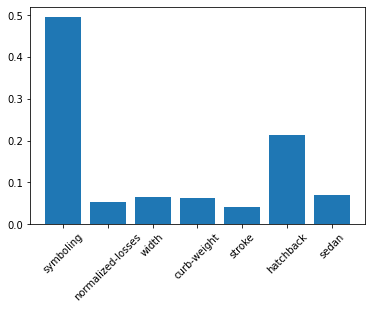

In [ ]:
x = range(len(y))
plt.bar(x, y)
plt.xticks(x, y.index,rotation = 45)

### 3 наиболее важных признака в обратной сортировке

In [ ]:
y.sort_values().iloc[-4: -1]

width        0.064284
sedan        0.069761
hatchback    0.213792
dtype: float64

## Этап 3. Демонстрация работы RandomForestClassifier

### Построение леса

In [ ]:
import sklearn.ensemble

#количество деревьев 20
forest = sklearn.ensemble.RandomForestClassifier( n_estimators=20, random_state=17 )
forest.fit( tdtr, y_train )

RandomForestClassifier(n_estimators=20, random_state=17)

### Посмотрим на долю правильных ответов

In [ ]:
metr.accuracy_score( y_test, forest.predict(tdt) )

0.8269230769230769

### При помощи GridSearchCV произвести подбор гиперпараметров для поиска наилучшего леса

In [ ]:
forest_params = {
    'max_depth': range(1,20),
    'max_features': range(3,15)
}
#подбираем параметры 
#чем больший охват у параметров, тем дольше работает алгоритм, поэтому надо аккуратнее подбирать
forest_grid = sklearn.model_selection.GridSearchCV(forest, forest_params, cv = 5)

forest_grid.fit( tdtr, y_train )

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=20, random_state=17),
             param_grid={'max_depth': range(1, 20),
                         'max_features': range(3, 15)})

### Посмотрм на определенные параметры

In [ ]:
forest_grid.best_params_, forest_grid.best_score_ 

({'max_depth': 9, 'max_features': 11}, 0.9286021505376343)

### Посмотрим на долю правильных ответов

In [ ]:
metr.accuracy_score( y_test, forest_grid.predict(tdt) ) 

0.8461538461538461

#Итоги
По итогу самым точным алгоритмом оказался "Лес" и "Дерево" с долей правильных ответов в 0.82, следом идет kNN с  0.69. Оптимизация параметров, увеличивает долю правильных ответов в пределах до +0.1 для каждого случая.